In [57]:
%matplotlib inline

import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl 
import pandas as pd
import contextily as ctx
from mplcairo import operator_t
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [58]:
def replace_legend_items(legend, mapping):
    for txt in legend.texts:
        k = txt.get_text()
        txt.set_text(mapping[int(float(k))])

In [59]:
lotes = gpd.read_file('./data/LOTES/lotes_completo.shp')
recorte = gpd.read_file('./data/BASES/limite_recorte/limite_recorte.shp')
recorte = recorte.to_crs(epsg=3857)
lotes = lotes.to_crs(epsg=3857)

In [60]:
lotes_recorte =  gpd.overlay(lotes, recorte, how='intersection')

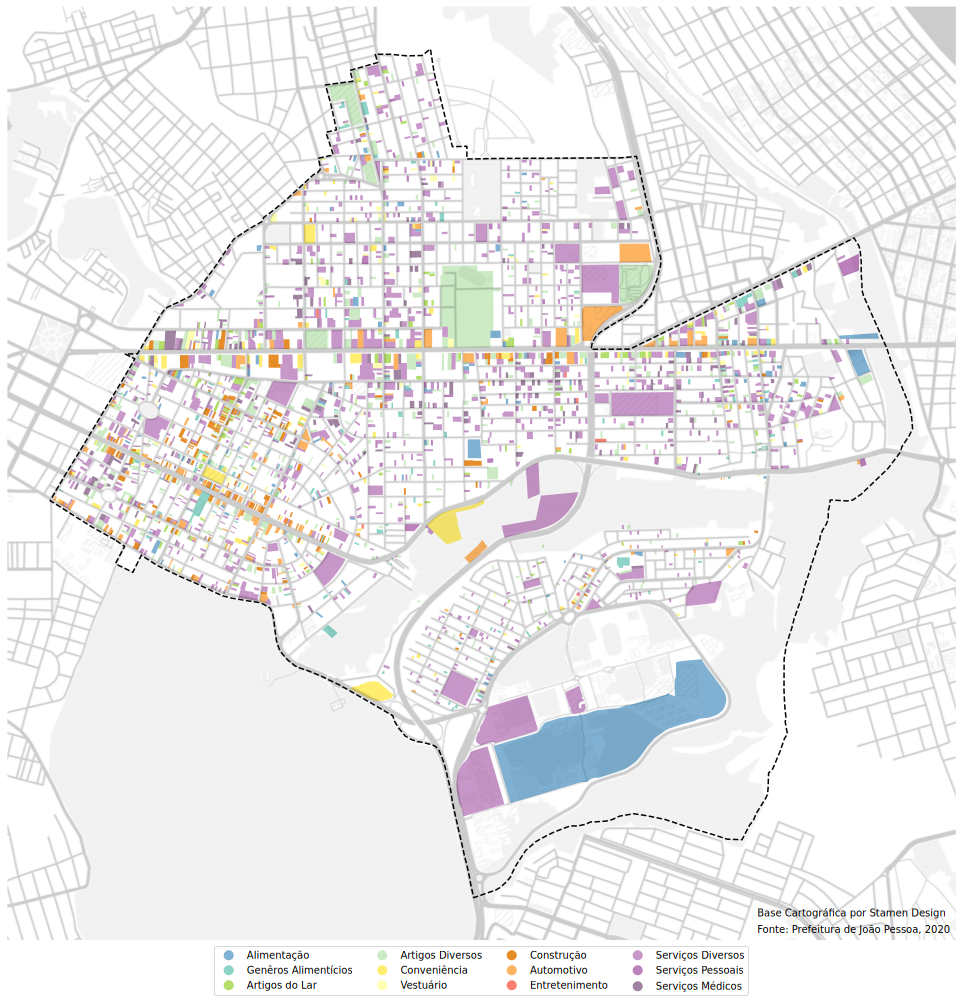

In [61]:
plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False
#plt.style.use('ggplot')
plt.rcParams['figure.facecolor'] = '#FFFFFF'
plt.rcParams['figure.edgecolor'] = 'red'
mpl.rcParams['legend.facecolor'] = '#FFFFFF'
mpl.rcParams['figure.edgecolor'] = 'black'
mpl.rcParams['legend.loc'] = 'lower center'


colors = [
'#80b1d3',
'#8dd3c7',
'#b3de69',
'#ccebc5',
'#ffed6f',
'#ffffb3',
'#e68d28',
'#fdb462',
'#fb8072',
'#c897c9',
'#bc80bd',
'#a082a1'
]


fig, ax = plt.subplots()
ax.set_facecolor('none')
ax.set_axis_off()


#quadras.plot(ax=ax, facecolor='#ffffff', edgecolor='#cccccc', linewidth=0.1)
plot = lotes_recorte.plot(ax=ax, 
                   column='classifica', 
                   legend=True, 
                   cmap=mpl.colors.ListedColormap(colors),
                   categorical=True,
                   linewidth=0,
                   legend_kwds={'loc': 'lower center',
                                'ncol': 4})
#bairros.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=0.4, linestyle='--', alpha=0.5)
recorte_plot = recorte.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1.5, linestyle='--')

legend_dict={1: 'Alimentação',
             2: 'Genêros Alimentícios',
             3: 'Artigos do Lar',
             4: 'Artigos Diversos',
             5: 'Conveniência',
             6: 'Vestuário',
             7: 'Construção',
             8: 'Automotivo',
             9: 'Entretenimento',
             10: 'Serviços Diversos',
             11: 'Serviços Pessoais',
             12: 'Serviços Médicos',}



replace_legend_items(ax.get_legend(), legend_dict)
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.5, -0.065))


#ctx.add_basemap(ax, source=ctx.providers.CartoDB.PositronNoLabels, zoom=16, alpha = 1)
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerBackground, zoom=16, alpha = 0.2, attribution="")
operator_t.MULTIPLY.patch_artist(plot)  # Use additive blending.
plt.annotate('Fonte: Prefeitura de João Pessoa, 2020', (0,0), (750, 10), xycoords='axes fraction', textcoords='offset points', va='center')
plt.annotate('Base Cartográfica por Stamen Design', (0,0), (750, 27), xycoords='axes fraction', textcoords='offset points', va='center')
plt.tight_layout()
plt.savefig('varejo_area_recorte.pdf', bbox_inches='tight')

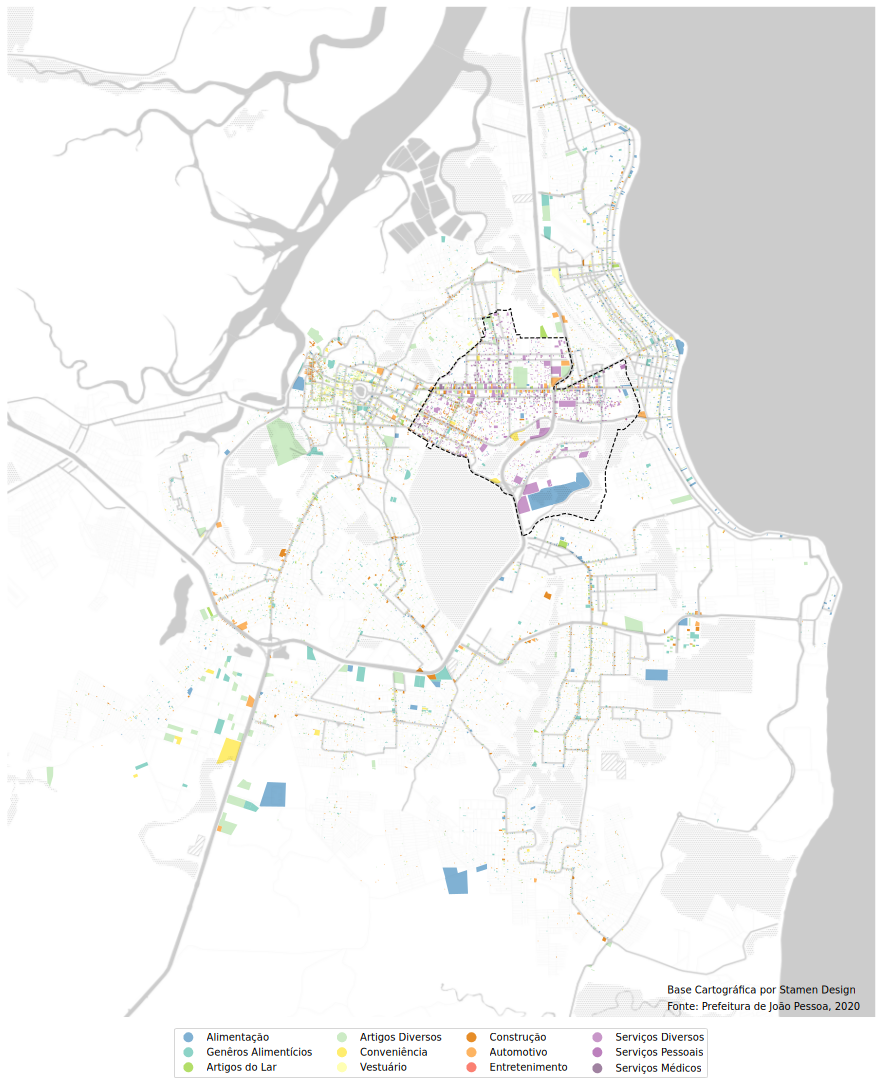

In [62]:
plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False
#plt.style.use('ggplot')
plt.rcParams['figure.facecolor'] = '#FFFFFF'
plt.rcParams['figure.edgecolor'] = 'red'
mpl.rcParams['legend.facecolor'] = '#FFFFFF'
mpl.rcParams['figure.edgecolor'] = 'black'
mpl.rcParams['legend.loc'] = 'lower center'


fig, ax = plt.subplots()
ax.set_facecolor('none')
ax.set_axis_off()


#quadras.plot(ax=ax, facecolor='#ffffff', edgecolor='#cccccc', linewidth=0.1)
plot = lotes.plot(ax=ax, 
                   column='classifica', 
                   legend=True, 
                   cmap=mpl.colors.ListedColormap(colors),
                   categorical=True,
                   linewidth=0,
                   legend_kwds={'loc': 'lower center',
                                'ncol': 4})
#bairros.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=0.4, linestyle='--', alpha=0.5)
recorte_plot = recorte.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1.1, linestyle='--')

legend_dict={1: 'Alimentação',
             2: 'Genêros Alimentícios',
             3: 'Artigos do Lar',
             4: 'Artigos Diversos',
             5: 'Conveniência',
             6: 'Vestuário',
             7: 'Construção',
             8: 'Automotivo',
             9: 'Entretenimento',
             10: 'Serviços Diversos',
             11: 'Serviços Pessoais',
             12: 'Serviços Médicos',}


replace_legend_items(ax.get_legend(), legend_dict)
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.5, -0.065))


#ctx.add_basemap(ax, source=ctx.providers.CartoDB.PositronNoLabels, zoom=16, alpha = 1)
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerBackground, zoom=13, alpha = 0.2, attribution="")
operator_t.MULTIPLY.patch_artist(plot)  # Use additive blending.
plt.annotate('Fonte: Prefeitura de João Pessoa, 2020', (0,0), (660, 10), xycoords='axes fraction', textcoords='offset points', va='center')
plt.annotate('Base Cartográfica por Stamen Design', (0,0), (660, 27), xycoords='axes fraction', textcoords='offset points', va='center')
plt.tight_layout()
plt.savefig('comercio_cidade.pdf', bbox_inches='tight')

In [118]:
#TODO: CHANGE TO QUANTILES

def get_bins(df, column, n_bins):
    min_v = df[column].min()
    max_v = df[column].max()
    array = []
    
    for i in range(n_bins+1):
        step = max_v/n_bins
        array.append(int(round(step*i, 0)))
    
    return array

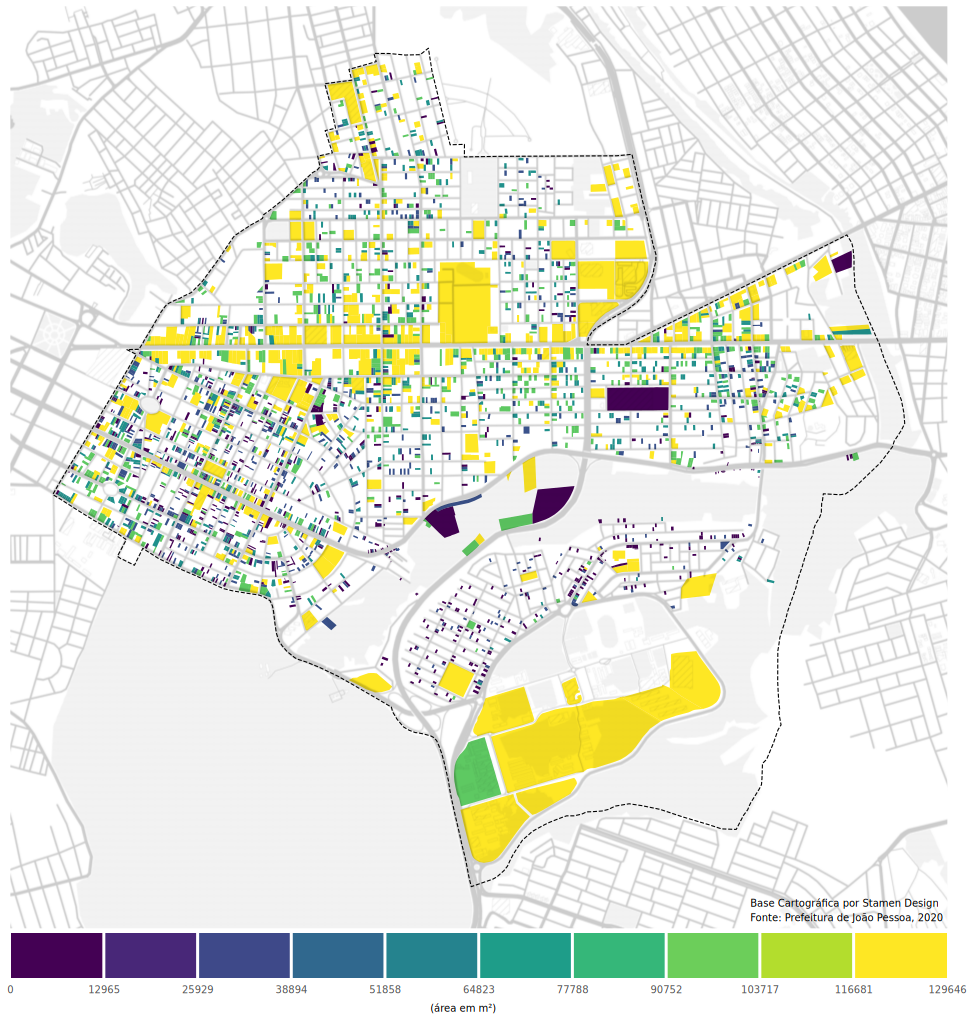

In [124]:
plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.style.use('ggplot')
plt.rcParams['figure.facecolor'] = '#FFFFFF'
plt.rcParams['figure.edgecolor'] = 'red'
mpl.rcParams['legend.facecolor'] = '#FFFFFF'
mpl.rcParams['figure.edgecolor'] = 'black'
mpl.rcParams['legend.loc'] = 'lower center'


column = 'Area_Total'
fig, ax = plt.subplots()
ax.set_facecolor('none')
ax.set_axis_off()


#quadras.plot(ax=ax, facecolor='#ffffff', edgecolor='#cccccc', linewidth=0.1)
plot = lotes_recorte.plot(ax=ax, 
                          column=column, 
                          legend=False, 
                          cmap='viridis',
                          linewidth=0,
                          scheme='quantiles', 
                          #classification_kwds={'bins':bins},
            edgecolor='#FFFFFF'
           )
cmap = mpl.cm.viridis
divider = make_axes_locatable(ax)
bins = get_bins(lotes_recorte, column, 10)

norm = mpl.colors.BoundaryNorm(bins, cmap.N)



cax = divider.append_axes("bottom", size="5%", pad=0.05)

cb = mpl.colorbar.ColorbarBase(ax=cax, cmap=cmap,
                                norm=norm,
                                spacing='uniform',
                                orientation='horizontal',
                                extend='neither',
                               #TODO: CHANGE TO QUANTILES
                                ticks=bins,
                                drawedges=True,
                                )



recorte_plot = recorte.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1.1, linestyle='--')



# The figure and axes background must be made transparent.


ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerBackground, zoom=16, alpha = 0.2, attribution="")
cb.outline.set_edgecolor('#ffffff')
cb.dividers.set_linewidth(3)
cax.tick_params(color='none')

plt.annotate('Fonte: Prefeitura de João Pessoa, 2020', (0,0), (740, 60), xycoords='axes fraction', textcoords='offset points', va='center')
plt.annotate('Base Cartográfica por Stamen Design', (0,0), (740, 75), xycoords='axes fraction', textcoords='offset points', va='center')
plt.annotate('(área em m²)', (0,0), (420, -30), xycoords='axes fraction', textcoords='offset points', va='center')

plt.tight_layout()
operator_t.MULTIPLY.patch_artist(plot)  # Use additive blending.
plt.savefig('varejo_area_construida.pdf', bbox_inches='tight')
plt.show()